Please, fill your data

| Student | NOMA |
|--- | |
|Nils Boulanger| 58491500|
|Harun Gök| 82031900|
|Asmaa Semmah| 73111500|

Please make sure to read carrefully the statement and the questions. You can create new cells (markdown or code) if you need it to answer questions.  <br>
Finally, don't hesitate to ask questions on the Moodle Forum. <br>
The deadline is Thursday, November 12.

# Context
You are the boss of the Amazing Glass Cutters company. You have a plenty of commands that you need to cut from your standard glass panes that measure 2440x2440 $mm$. The measures are given in millimeter for precision. Commands are supposed to correspond to rectangles (with maximum length of 2440 $mm$). <br>
To minimize the loss of glass when preparing the commands, you should solve a difficult optimization problem: the 2D bin packing problem. This latter is NP-complete and you don't have qualified personal for searching good heuristic for solving the problem. You hire a consultance group for working on that problem. <br>
You are waiting for their answer in a few months, but you need a simple solution right now! Also, it will allow you to see if the price you pay the consultance group is worth it or not...  <br>
Therefore, you try a simpler approach proposed by your intern who has just come back from his algorithmic course:

You will search, if possible, for two commands of glass that fill completely the length (or the width) of your standard glass pane. According to the opinion of your intern, it can be done efficiently. <br>
It is obviously not solving the problem totally but it is a first step allowing you to cuts at least some commands efficiently. Since you don't have any other idea (sadly), you will implement an algorithm to solve this problem with your intern. Decide which of you is the intern and which of you is the boss. 

# The problem
You consider a list with the length and the width of each command (in mm).  <br>

``` commands = [list of lengths,  list of widths] ```

You need to find two elements in the list that sums up to 2440. Of course, you still need to check that the two elements you have found correspond to two different commands and are not the length and the width of the same command.

The lists for the problem are randomly initialized below. All the package you need are already imported in the corresponding cells.

In [9]:
import random 

def generate_com(size,nb_com,verbose = 1):
    len_list = []
    width_list = []
    for i in range(0,nb_com):
        len_list.append(random.randint(1,size))
        width_list.append(random.randint(1,size))
    if verbose:
        print("Length of the first commands:",len_list[0:10])
        print("Width of the first commands:", width_list[0:10])

    return (len_list, width_list)
        
# Standard size of your glass panes
size = 2440
# list of length and width of the commands
nb_com = 100
(len_list, width_list) = generate_com(size,nb_com)
commands = len_list + width_list
print(commands[199], len(commands))
print(range(0,200))

Length of the first commands: [677, 1631, 691, 1629, 2185, 397, 1987, 2386, 2239, 1780]
Width of the first commands: [1950, 176, 2406, 2327, 375, 2361, 1823, 2048, 1070, 395]
2166 200
range(0, 200)


### 1. Naive Approach (1 pt)

Implement a naive function that solves the problem by testing all possible pairs of elements.
The function ```naive_sum_search``` should repesect the specification given below.

In [11]:
def naive_sum_search(A, sum):
    """ 
    naive_sum_search function returns a pair of indices (i,j) of the list A such that A[i] + A[j] = sum. 
    A is a list of positive integers of size n (n is supposed even). 
    The first n/2 elements of A are the length of the commands and the last n/2 elements are the width of the commands. 
    Make sure your pair (i,j) represents two different commands.
    If no such pair exist the function should return (-1,-1)
    """
    
    # TO DO
    pair1, pair2 = -1, -1
    for i in range(0,len(A)) : 
        for j in range(0, len(A)) : 
            if A[i] + A[j] == sum and i+len(A)/2 != j and i!=j: 
                pair1 = i
                pair2 = j
                break
        if pair1 >0 and pair2>0: 
            break
    return (pair1,pair2)

# pair of indices
(c1, c2) = naive_sum_search(commands, size)
if (c1,c2)==(-1,-1):
    print("No pair found")
else:
    print("You should combine commands", c1%nb_com," and ", c2%nb_com)
    print("Indeed,", commands[c1],"+", commands[c2]," equal", commands[c1]+commands[c2],c1,c2)


No pair found


### 2. Using a suitable data structure (4 pts)

To improve the complexity of your naive algorithm, you can use a [dictionary abstract data type](https://www.eecs.umich.edu/courses/eecs281/f04/lecnotes/05-Dictionary%20ADT-v2.pdf). This allows you to store (key, value) pairs and to search for a specific key. In that way, when you loop into the array of commands, you can search into the dictionary for another command that sums with the current one to give the exact size of the glass pane. If no pair is found with the current command, this latter is added to the dictionary (to match with future commands).

Let us try and compare two different data structures to implement a dictionary abstract data type: the red-black tree and the hash table.

**2.1 Red Black Tree (2 pts)** <br>
The first data-strucutre we try for implementing a dictionary is the [Red-Black Tree](https://en.wikipedia.org/wiki/Red%E2%80%93black_tree). It is a kind of self-balancing binary search tree. Each node has a specific color (red or black) that is used to ensure that the tree remains approximately balanced during insertions and deletions. 

Insertion, Deletion and Search into Red-Black-Tree are performed in $O(\log k)$ (where $k$ denotes the number of elements in the tree).

We will use the implementation from package ```bintrees``` that you can install with the command below.

In [7]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install bintrees

Implement a function that solves the problem by using a Red-Black Tree.
The function ```BST_sum_search``` should repesect the specification given below.

In [6]:
import bintrees as bt

def BST_sum_search(A, sum):
    """ 
    BST_sum_search function returns a pair of indices (i,j) of the list A such that A[i] + A[j] = sum. 
    A is a list of positive integers of size n (n is supposed even). 
    The first n/2 elements of A are the length of the commands and the last n/2 elements are the width of the commands. 
    Make sure your pair (i,j) represents two different commands.
    If no such pair exist the function should return (-1,-1)
    """
    #construction a red black tree, the node are ordered by the value of their length/width 
    T = bt.RBTree()
    for i in range(len(A)) :
        T.insert(A[i],i)

    node = T._root
    ind1, ind2 = -1, -1
    for i in range(len(A)) : 
        #start searching its match in the RBT construced above 
        while node is not None : 
            if  A[i] + node.key ==sum:
                ind1 = i
                ind2 = node.value
                break
            elif A[i] + node.key > sum :
                node = node.left
            elif A[i] + node.key < sum :  
                node = node.right
        if node is None : 
            node = T._root
            pass 
        if ind2>0 : 
            break
    return (ind1,ind2)

# pair of indices
(c1, c2) = BST_sum_search(commands, size)

if (c1,c2)==(-1,-1):
    print("No pair found")
else:
    print("You should combine commands", c1%nb_com," and ", c2%nb_com)
    print("Indeed,", commands[c1],"+", commands[c2]," equal", size)

No pair found


What is the worst-case complexity of your algorithm ? <br>
Answer : search is in O(log(n)) and worst case we do it n times, justify later
https://www.geeksforgeeks.org/red-black-tree-set-1-introduction-2/

**2.2 Hash Tables (2 pts)** <br>

A [hash table](https://en.wikipedia.org/wiki/Hash_table) is a data structure that can map keys to values. It basically makes use of a function that computes an index value that in turn holds the elements to be searched, inserted, removed, etc. This allows quick and easy access to data. In general, hash tables store key-value pairs and the key is generated using a hash function.

Insertion, Deletion and Search into hash tables are performed in $O(1)$ expected time (where $k$ denotes the number of elements in the hash table). The deterministic worst-case of the hash-table occurs when all the keys are mapped into the same index (which is a collision) and is $O(k)$. But, the hash function is chosen to limit the collisions in expectation and therefore the worst-case complexity in expectation is well $O(1)$. 

See the following links for details about hash tables: <br>
https://en.wikipedia.org/wiki/Hash_table <br>
http://homepage.divms.uiowa.edu/~kvaradar/fall2012/hashtables.pdf <br>

Dictionaries in python are actually implemented with hash tables. Modify your previous solution to replace the binary search tree by a hash table (i.e. a dictionary).

In [5]:
def hashtable_sum_search(A, sum):
    """ 
    hashtable_sum_search function returns a pair of indices (i,j) of the list A such that A[i] + A[j] = sum. 
    A is a list of positive integers of size n (n is supposed even). 
    The first n/2 elements of A are the length of the commands and the last n/2 elements are the width of the commands. 
    Make sure your pair (i,j) represents two different commands.
    If no such pair exist the function should return (-1,-1)
    """
    
    #construct dictionnary (Python form of hashtable)
    D = {}
    ind1, ind2 = -1,-1
    for i in range(len(A)) : #insertion
        D.update({A[i]:i})
    for i in range(len(A)) : 
        #start searching its match in the Hashtable construced above 
        if  D.get(sum-A[i]) is not None :
                ind1 = i
                ind2 = D.get(sum-A[i])
                break
           
        if ind2>0 : 
            break
    return (ind1,ind2)

# pair of indices
(c1, c2) = hashtable_sum_search(commands, size)

if (c1,c2)==(-1,-1):
    print("No pair found")
else:
    print("You should combine commands", c1%nb_com," and ", c2%nb_com)
    print("Indeed,", commands[c1],"+", commands[c2]," equal", size)

No pair found


What is the worst-case complexity of your algorithm (in expectation) ? <br>

### 3. Complexity Comparison (2 pts)

- Run an experiment to compare the execution time of each method. 
- Use the function ```time.time()```.
- Set ```size``` to 2440000 and make the number of commands vary **between 0 and 1000** (by step of 50 or 100).
- For each value, run the experiment at least **50 or 100** times and **average the execution time of each method**.
- Make a plot of your results and comment.

Compare the advantages and drawbacks of a Red-Black-Tree versus a hash table.

**Note**: The value 2440000 for```size``` can be seen as the same as before but in micrometer. This choice is mainly for avoiding having too tiny execution time. You can change the parameters to obtains other interesting (or better) plots.

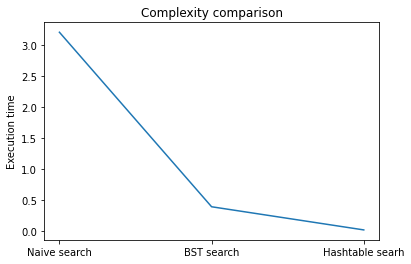

In [10]:
import matplotlib.pyplot as plt
import time

size = 2440000
# list of number of commands
num_comd_lst = list(range(100,1000,100))

# list of list of length and width of the commands
commands_lst = []
for num in num_comd_lst:
    (len_lst, width_lst) = generate_com(size,num,verbose=0) 
    commands_lst.append(len_lst + width_lst)

def execution_time(alg,cmds,summ):
    """takes a search function, a list(commands) and a number(size)
    returns a list of times in which each element indicates the execution time of
    given function for given commands and size
    """
    start_time = time.time()
    for _i in range(50):
        alg(cmds,summ)
    end_time = time.time()
    return end_time - start_time

# algorithms list as functions
alg_lst = [naive_sum_search, BST_sum_search, hashtable_sum_search]

def avg_times(func_lst):
    """takes list of functions and return avarage execution time of each function"""
    times = []
    for func in func_lst:
        #execution times of the current function for given commands and size
        exec_times = [execution_time(func,cmds,size) for cmds in commands_lst]
        average_time = sum(exec_times)/len(exec_times)
        times.append(average_time)
    return times

# run avg_times and get the average times for algorithms
avg_times = avg_times(alg_lst)

#plot average times 
plt.plot(['Naive search', 'BST search', 'Hashtable searh'], avg_times)
#plt.xlabel("Algorithms")
plt.ylabel("Execution time")
plt.title("Complexity comparison")
plt.show()

#### TO-DO!
Compare the advantages and drawbacks of a Red-Black-Tree versus a hash table.

# What if we want to combine any number of commands on a glass pane ? 
**(4 pts)**

Since your simple solution is working well, you want to look for a little more sophistication. 
You would like to find a subset of commands that can be combined (either on their length or on their width) to be exactly 2440mm long. The subset can contain any number of commands (and not only 2 as it was the case in the previous problem).

To find a subset of commands that can be arranged to fill exactly the ```size``` of the standard pane, you can divide the problem into subproblems (top-down): <br>
A command ```c``` can either: <br>
&emsp; (1) be part of the subset on its length; in that case, you need to find a subset that sums to ```size - length(c)``` in the set of commands without ```c```. <br>
&emsp; (2) be part of the subset on its width; in that case, you need to find a subset that sums to ```size - width(c)``` in the set of commands without ```c```. <br>
&emsp; (3) be excluded from the subset; you need to find a subset that sums to ```size``` in the set of command without ```c```.

To avoid recomputing solution to subproblems that have already occurred, you should make use of a hash table in order to store the results of each subproblem you encounter. This is the principle of [memoization](https://en.wikipedia.org/wiki/Memoization).

Don't forget to think about the base cases that are the solutions for the very basic versions of the problem and that allow to stop the recursion.

In [14]:
def sum_search(L, W, last, sum, lookup):
    """ 
    INPUTS:
        L and W are two list of positive integers of same size last+1 
        (i.e. 'last' is the index of the last element of the lists).
        sum is a positive integer
    OUTPUTS:
        sum_search function returns two list of indices (idx1, idx2).
        An indice can only appear one time in these lists.
        We should have that Sum(L[idx1]) + Sum(W[idx2]) = sum
        If no such indices exist, the function should return None
    """
    
    # TO DO
    
    # BASE cases
    
    # DIVISION (in 3 cases)

    return None


sum_set = sum_search(len_list, width_list, len(len_list) - 1, size, dict())
if sum_set is None:
    print("No arrangement found")
else:        
    print("Select the following commands (in their length):",sum_set[0])
    print("Select also the following commands (in their width):", sum_set[1])
    total = 0
    for i in sum_set[0]:
        total = total + len_list[i]
    for j in sum_set[1]:
        total = total + width_list[j]
    print("Total length of this arrangement is",total)

No arrangement found


What is the worst-case complexity of this method ? Comment.

Why is it said that this method uses the top-down approach ? <br>
Can you give the idea of a method that solves the problem using the bottom-up approach ?